In [1]:
import os
import pandas  as pd
import urllib.request
import re
import spacy
import re, string, unicodedata
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

In [2]:
os.chdir(r"D:\Data science\NLP\Senapathi sir's  LECTURES + NOTES\2nd nov\14. NLP WEB SCRAPING (1)\xml_many articles")

from glob import glob # for accessing all the file
path = r"D:\Data science\NLP\Senapathi sir's  LECTURES + NOTES\2nd nov\14. NLP WEB SCRAPING (1)\xml_many articles"
all_files = glob(os.path.join(path, "*.xml"))

In [3]:
import xml.etree.ElementTree as ET

dfs=[]
for filenames in all_files:
    tree = ET.parse(filenames)
    root = tree.getroot()
    root = ET.tostring(root,encoding='utf8').decode('utf8')
    dfs.append(root)

In [4]:
def data_preprocessing(each_file):
    
    parsed_article = BeautifulSoup(each_file,'xml')
    
    paragraphs = parsed_article.find_all('para')
    
    
    
    article_text_full = ""

    for p in paragraphs:
        article_text_full += p.text
        print(p.text)
    
    return article_text_full

In [5]:
data = [data_preprocessing(each_file) for each_file in dfs]

Nonexudative (dry) age-related macular degeneration (ARMD) (see the image below) comprises more than 90% of patients diagnosed with ARMD. ARMD is the most common cause of irreversible vision loss in the developed world; this condition is associated with the presence of drusen, without visual loss early in the disease, and often progresses to retinal atrophy and central retinal degeneration with associated loss of central vision. Generally, nonexudative ARMD has a much slower (over decades), progressive visual loss relative to exudative (wet) ARMD (over months).
Signs and symptoms of ARMD include the following:
Difficulty with night vision and with changing light conditions (specifically, changes in Amsler grid self-evaluation and trouble with reading) 
Visual fluctuation (ie, some days vision is poor; other days, vision appears improved)
Difficulty with reading and making out faces
Metamorphopsia (distortion of visual images): Not a major patient complaint, but it may be present as the

In [6]:
lem=WordNetLemmatizer()

In [7]:
def remove_stop_word(file):
    nlp = spacy.load("en_core_web_sm")
    
    punctuations = string.punctuation
    from nltk.corpus import stopwords
    stopwords = stopwords.words('english')
    SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]
    stopwords = nltk.corpus.stopwords.words('english')+SYMBOLS
    
    doc = nlp(file, disable=['parser', 'ner'])    
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
    s=[lem.lemmatize(word) for word in tokens]
    tokens = ' '.join(s)
    
    
    
    
    
    article_text = re.sub(r'\[[0-9]*\]', ' ',tokens)
    article_text = re.sub(r'\s+', ' ', article_text)
    
    
    formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )
    formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)
    formatted_article_text = re.sub(r'\W*\b\w{1,3}\b', "",formatted_article_text)
  
    return formatted_article_text

In [8]:
clean_data=[remove_stop_word(file) for file in data]
all_words = ' '.join(clean_data)

In [9]:
#all_words

In [10]:
len(all_words)

772960

In [11]:
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.preprocessing import normalize

vectorizer = CountVectorizer(stop_words=stopwords.words('english')).fit(clean_data)

feature_names = vectorizer.get_feature_names_out()
X=vectorizer.transform(clean_data).toarray()

data_final=pd.DataFrame(X,columns=feature_names)

In [12]:
# data_final.head(1)

aase  aasly  abandon  abbass  abbott  abbreviation  abdelrahman  abdoman  \
0     0      0        0       0       0             0            0        0   

   abdomen  abdominal  ...  zone  zorick  zoula  zuraw  zwaan  zwahlen  \
0        0          0  ...     4       0      0      0      0        0   

   zwirska  zytiga  zzzz  zzzzz  
0        0       0     0      0  

[1 rows x 12288 columns]

In [13]:
data_final.shape

(30, 12288)

In [14]:
X.shape

(30, 12288)

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer

tran=TfidfTransformer().fit(data_final.values)

X=tran.transform(X).toarray()

X = normalize(X)


# evaluate the importance of a word in a document relative to a collection of documents.
 

C:\Users\h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_

1 : 0.953430049437689
2 : 0.9305981019667716
3 : 0.9093760752899314
4 : 0.8853691835857924
5 : 0.8619327664960662
6 : 0.829917667952181
7 : 0.8104130511264067
8 : 0.7985039035451492
9 : 0.768115380234223
10 : 0.7414229968253896
11 : 0.6731932897589716
12 : 0.6382810047656535
13 : 0.6288135979900813
14 : 0.5730168314506229


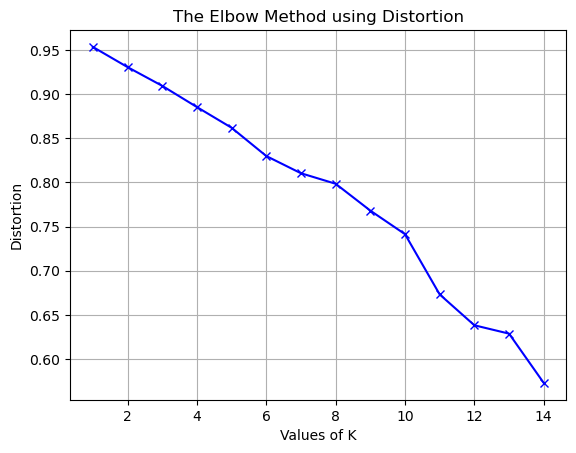

In [25]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,15) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 




for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.grid()
plt.show()

In [17]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)


order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

C:\Users\h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
terms.shape


(12288,)

In [19]:
order_centroids.shape

(6, 12288)

In [20]:
order_centroids[0]

array([3125, 1821, 9164, ..., 6908, 6910,    0], dtype=int64)

In [21]:

for i in range(true_k):
     print('Cluster %d:' % i),
     for ind in order_centroids[i, :50]:
         #print(ind)
         print(' %s' % terms[ind])

Cluster 0:
 divide
 child
 pustule
 abuse
 melanosis
 pustular
 neonatal
 appendicitis
 injury
 maltreatment
 component
 fracture
 hsee
 ampicillin
 burn
 macule
 neonatorum
 infant
 physical
 base
 piperacillin
 orampicillin
 tazobactam
 orticarcillin
 cilastin
 ticarcillin
 ormeropenem
 sulbactam
 orimipenem
 orpiperacillin
 clavulanate
 caregiver
 toxicum
 transient
 organism
 pediatric
 erythema
 list
 medline
 vesicle
 bone
 neglect
 include
 skin
 skeletal
 aztreonam
 orcefotetan
 palm
 case
 diagnosis
Cluster 1:
 cancer
 hysterectomy
 lymph
 node
 esophageal
 prostate
 patient
 sarcoma
 kaposi
 gastric
 medline
 axillary
 laparoscopic
 therapy
 surgery
 esophagus
 chemotherapy
 metastasis
 survival
 bariatric
 treatment
 uterine
 gastrectomy
 oncol
 carcinoma
 sleeve
 bypass
 uterus
 include
 stage
 disease
 surg
 fibroid
 ipsilateral
 mammary
 procedure
 dose
 adenocarcinoma
 study
 radiotherapy
 haart
 metastatic
 associate
 radiation
 weight
 rate
 detect
 castration
 clinica

In [22]:
import pandas as pd 


cluster_result_data= pd.DataFrame(clean_data,columns =['text'])

cluster_result_data['group']=model.predict(X)

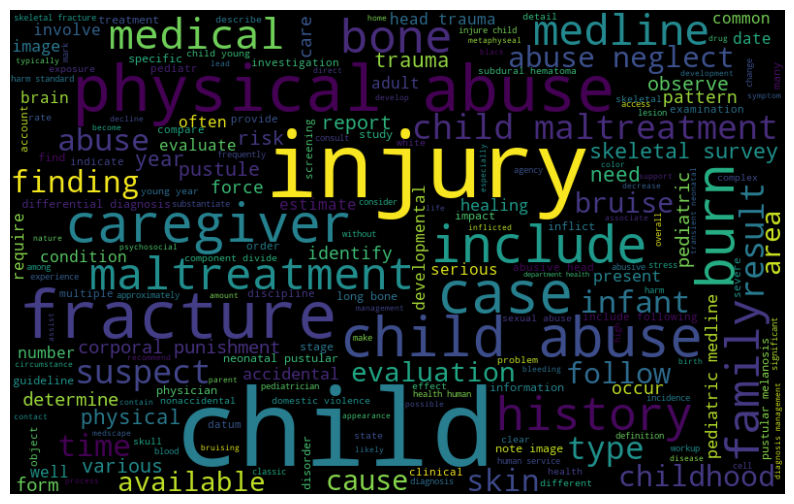

In [23]:
from wordcloud import WordCloud


normal_words =' '.join([text for text in cluster_result_data.loc[cluster_result_data['group'] == 0,'text'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

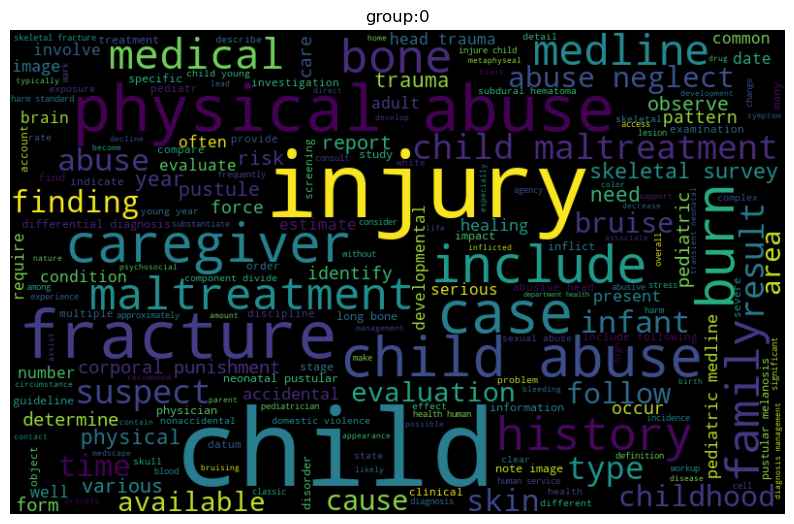

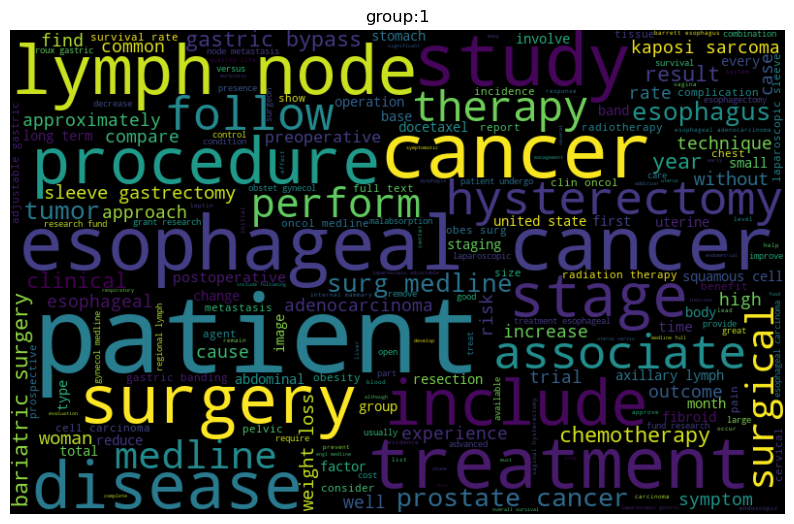

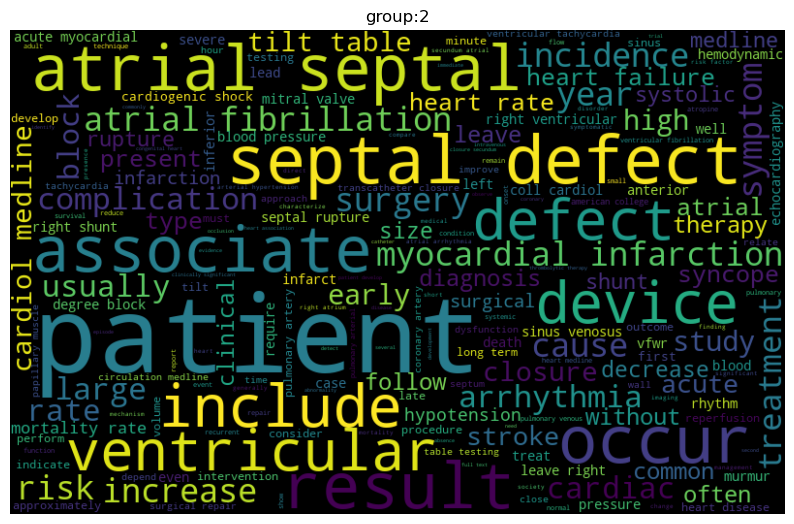

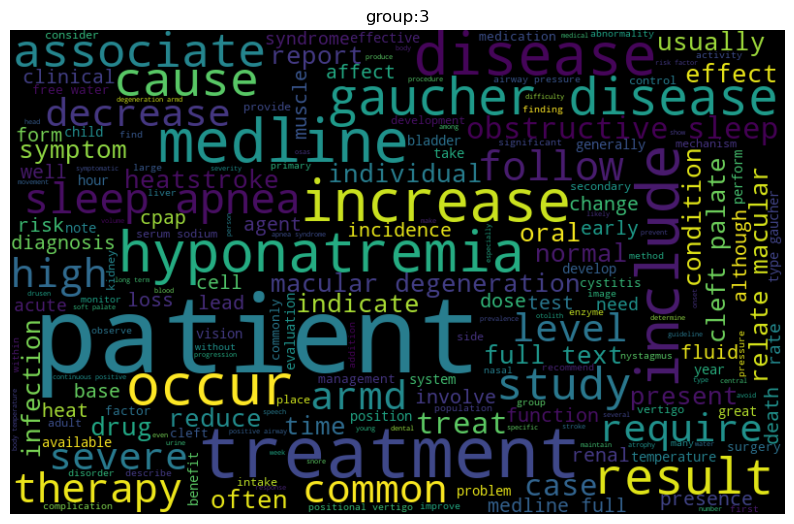

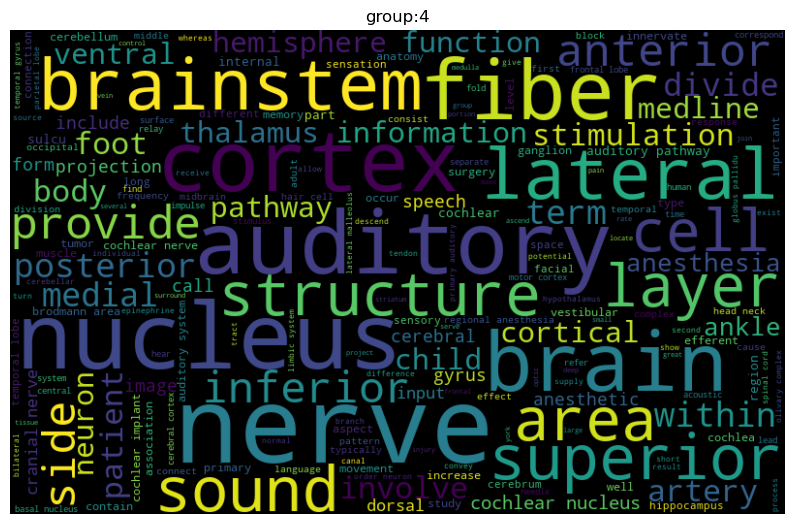

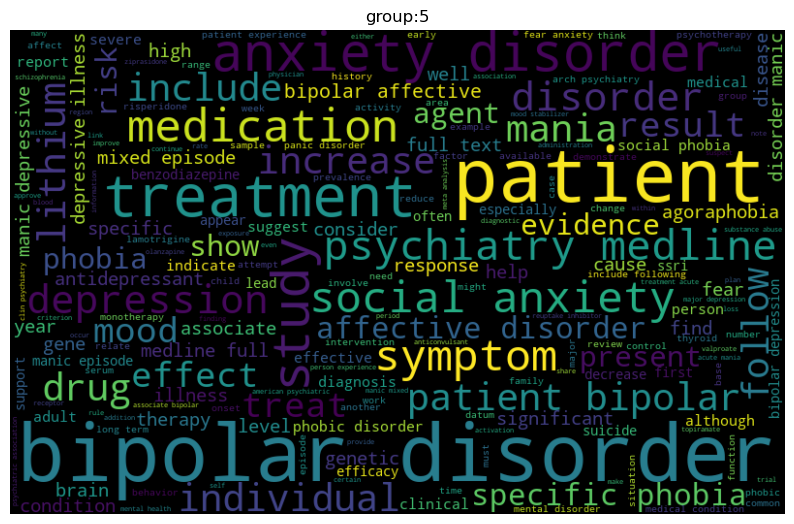

In [24]:
for num in range(0,6):
    
    normal_words =' '.join([text for text in cluster_result_data.loc[cluster_result_data['group'] == num,'text'] ])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title('group:'+str(num))
    plt.show()